In [1]:
## Addresses Reading through GST no.:

In [2]:
## import the necessary packages
from skimage.exposure import rescale_intensity
import numpy as np
from PIL import Image
import pytesseract
import cv2
from pytesseract import Output
import pandas as pd
import math
import re

width/columns = 2528, height/rows = 3504


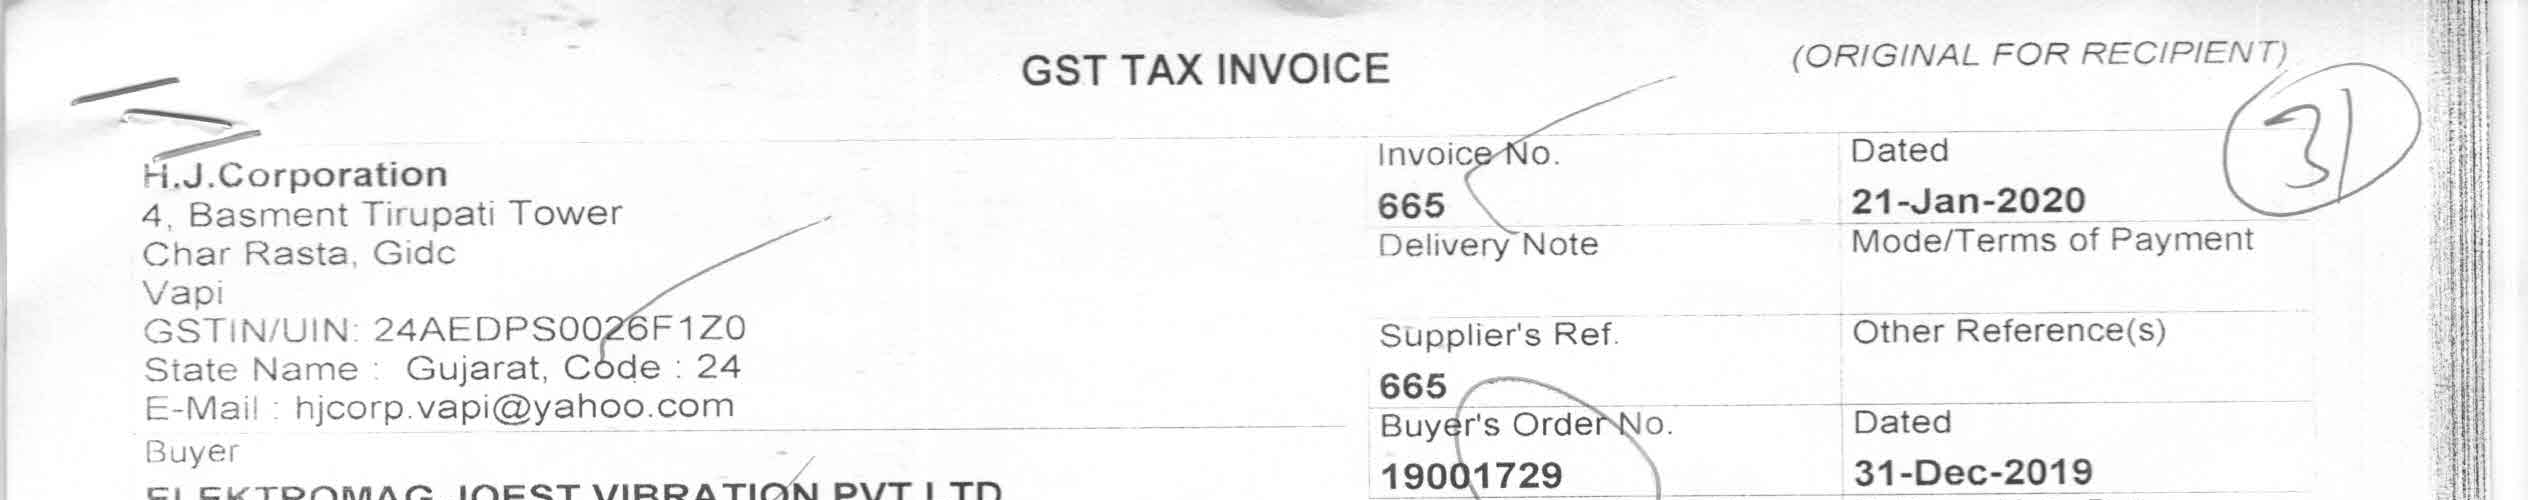

In [3]:
image_1 = cv2.imread("INVOICE1.jpg", 0) ## Loading image directly as black & white.
(H, W) = image_1.shape # H = no. of rows, W = no. of columns
print("width/columns = {}, height/rows = {}".format(W, H))
# Display in original size :
image_pil_1 = Image.fromarray(image_1[0:500, :]) 
display(image_pil_1) 

In [4]:
## Converting image to text and create pandas dataframe with all text cordinates and making texts in lower case

image_1_data = pytesseract.image_to_data(image_1, output_type=Output.DICT)
image_1_pd = pd.DataFrame(image_1_data)

image_1_pd_sorted =image_1_pd.sort_values(['top', 'left']).reset_index()
image_1_pd_sorted['text'] = image_1_pd_sorted['text'].map(lambda x: x if type(x)!=str else x.lower()) ## make Items in lower case

image_1_pd_sorted[25:100]

,index,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
25,41,6,88,24,1853,5,1,1,1,dated,138,95,3
26,40,6,75,21,1380,5,1,1,1,invoiceno.,144,179,2
27,42,6,-1,45,142,3,0,1,2,,187,1943,0
28,43,6,-1,45,142,4,1,1,2,,187,1943,0
29,50,6,89,28,1852,5,1,1,2,21—jan—2020,187,233,7
30,49,6,94,27,1378,5,1,1,2,665,192,67,6
31,47,6,91,26,509,5,1,1,2,tower,200,114,4
32,46,6,90,31,363,5,1,1,2,tirupati,201,130,3
33,45,6,89,26,191,5,1,1,2,basment,202,157,2
34,44,6,63,24,142,5,1,1,2,"4,",204,29,1


In [11]:
image_3_inv_pd= image_1_pd_sorted[image_1_pd_sorted['text'].str.count('^gsti')>0].reset_index(drop=True)
image_3_inv_pd

,index,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,147,6,91,26,148,5,5,1,6,gstin/uin,609,202,1
